In [581]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
%matplotlib inline
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/results/acc/'
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
taskList=['mem','glass','semantic','motor']
subDir = thisDir + 'output/results/subNetwork/'
randDir=thisDir + 'output/results/rdmNetwork/'
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)

#Same Task (Fig 1)
pairCV=pd.read_csv(outDir+'CV/acc.csv', usecols=[0,1,2])
t_DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Different Subject'
pairCV['Analysis']='Same Subject'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_glass=pair_res[pair_res.task=='glass']
pair_sem=pair_res[pair_res.task=='semantic']
#memory
pair_mem=pair_res[pair_res.task=='mem']



#Different task (Fig 2)
SS_diff=pd.read_csv(outDir+'SS/stats.csv', usecols=[0,1,2,3])
SS_diff['analysis']='Same Subject'
BS_diff=pd.read_csv(outDir+'BS/stats.csv', usecols=[0,1,2,3,4])
BS_diff['analysis']='Different Subject'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_glass=diff_res[diff_res.train_task=='glass']
diff_sem=diff_res[diff_res.train_task=='semantic']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#Make color palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)

#adding thinner lines to different task analysis figure
t_SS=pd.read_csv(outDir+'SS/acc.csv',usecols=[0,1,2,3])
t_BS=pd.read_csv(outDir+'BS/acc.csv',usecols=[0,1,2,3,4])

pairBS=pd.DataFrame()
for task in taskList:
    for test_task in taskList:
        if task==test_task:
            continue
        else:
            tmp=t_BS[(t_BS.train_task==task)&(t_BS.test_task==test_task)]
            tmp_mu=tmp.groupby(['train_sub']).mean()
            tmp_mu['train_task']=task
            tmp_mu['test_task']=test_task
            pairBS=pd.concat([pairBS,tmp_mu])
pairBS.reset_index(inplace=True)
pairBS.rename(columns={'train_sub':'sub'},inplace=True)
pairBS['Analysis']='Different Subject'


t_SS['Analysis']='Same Subject'
DT_sep=pd.concat([pairBS, t_SS])

#motor
DT_motor=DT_sep[DT_sep.train_task=='motor']
DT_motor_sem=DT_motor[DT_motor.test_task=='semantic']
DT_motor_mem=DT_motor[DT_motor.test_task=='mem']
DT_motor_glass=DT_motor[DT_motor.test_task=='glass']
#glass
DT_glass=DT_sep[DT_sep.train_task=='glass']
DT_glass_sem=DT_glass[DT_glass.test_task=='semantic']
DT_glass_mot=DT_glass[DT_glass.test_task=='motor']
DT_glass_mem=DT_glass[DT_glass.test_task=='mem']
#semantic
DT_sem=DT_sep[DT_sep.train_task=='semantic']
DT_sem_glass=DT_sem[DT_sem.test_task=='glass']
DT_sem_mot=DT_sem[DT_sem.test_task=='motor']
DT_sem_mem=DT_sem[DT_sem.test_task=='mem']
#memory
DT_mem=DT_sep[DT_sep.train_task=='mem']
DT_mem_sem=DT_mem[DT_mem.test_task=='semantic']
DT_mem_mot=DT_mem[DT_mem.test_task=='motor']
DT_mem_glass=DT_mem[DT_mem.test_task=='glass']

Text(0.5, 0, 'Same Task')

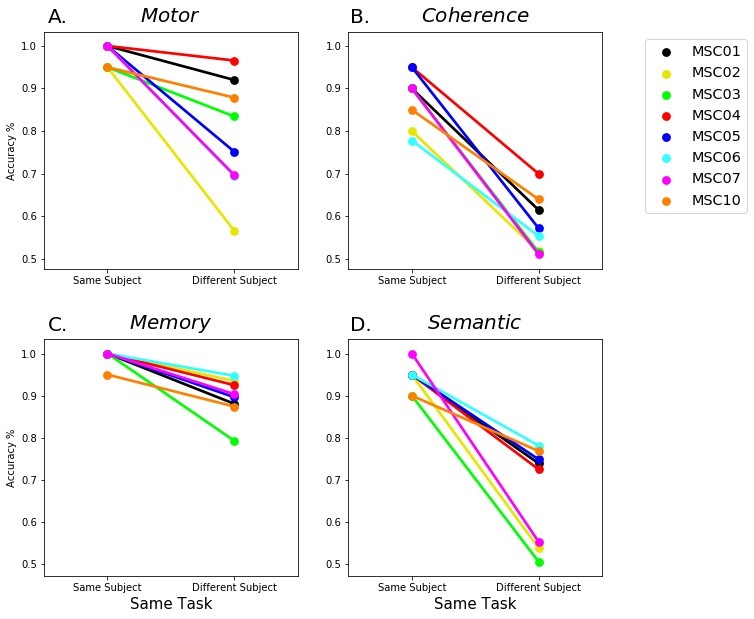

In [569]:
#Same Task (Fig 1)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
plt.xlabel('')
plt.ylabel('Accuracy %')
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
plt.ylabel('Accuracy %')
plt.xlabel('Same Task',fontsize=15)

ax4=fig.add_subplot(gs[1,1],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.6, 2.3),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('Same Task',fontsize=15)
#plt.savefig(thisDir+'output/FigsFinal/CVDS_point_plots.png', bbox_inches='tight')

[Text(0, 0.5, ' ')]

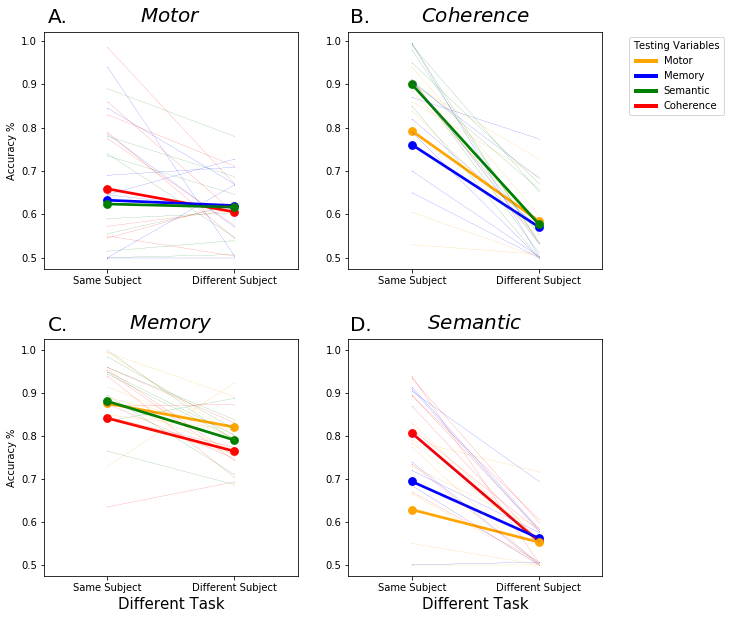

In [570]:
#Different Task (fig 2)
#need to add lines for individual subjects
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
#Motor
ax2=fig.add_subplot(gs[0,0])
#plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','blue','green'],ci=None, data=diff_motor, ax=ax2)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_motor_sem, palette=['green'],ax=ax2)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_motor_mem, palette=['blue'],ax=ax2)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_motor_glass, palette=['red'],ax=ax2)
g3.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %")
#Glass
ax1=fig.add_subplot(gs[0,1],sharey=ax2)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", palette=['blue','orange','green'],ci=None, data=diff_glass, ax=ax1)
#plt.setp(ax1.get_xticklabels(), visible=False)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_glass_sem, palette=['green'],ax=ax1)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_glass_mem, palette=['blue'],ax=ax1)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_glass_mot, palette=['orange'],ax=ax1)
g3.legend_.remove()
ax.set(ylabel=' ')
ax.set_title('$Coherence$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Variables')

#Memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','orange','green'],ci=None, data=diff_mem, ax=ax3)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_mem_sem, palette=['green'],ax=ax3)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_mem_glass, palette=['red'],ax=ax3)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_mem_mot, palette=['orange'],ax=ax3)
g3.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.xlabel('Different Task', fontsize=15)
ax.set(ylabel='Accuracy %')
#Semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['red','blue','orange'], data=diff_sem, ax=ax4)
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_sem_glass, palette=['red'],ax=ax4)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_sem_mem, palette=['blue'],ax=ax4)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_sem_mot, palette=['orange'],ax=ax4)
g3.legend_.remove()
ax.set_title('$Semantic$', fontsize=20, pad=10)
plt.xlabel('Different Task', fontsize=15)
ax.set(ylabel=' ')
#plt.savefig(thisDir+'output/FigsFinal/SSBS_point_plots.png', bbox_inches='tight')


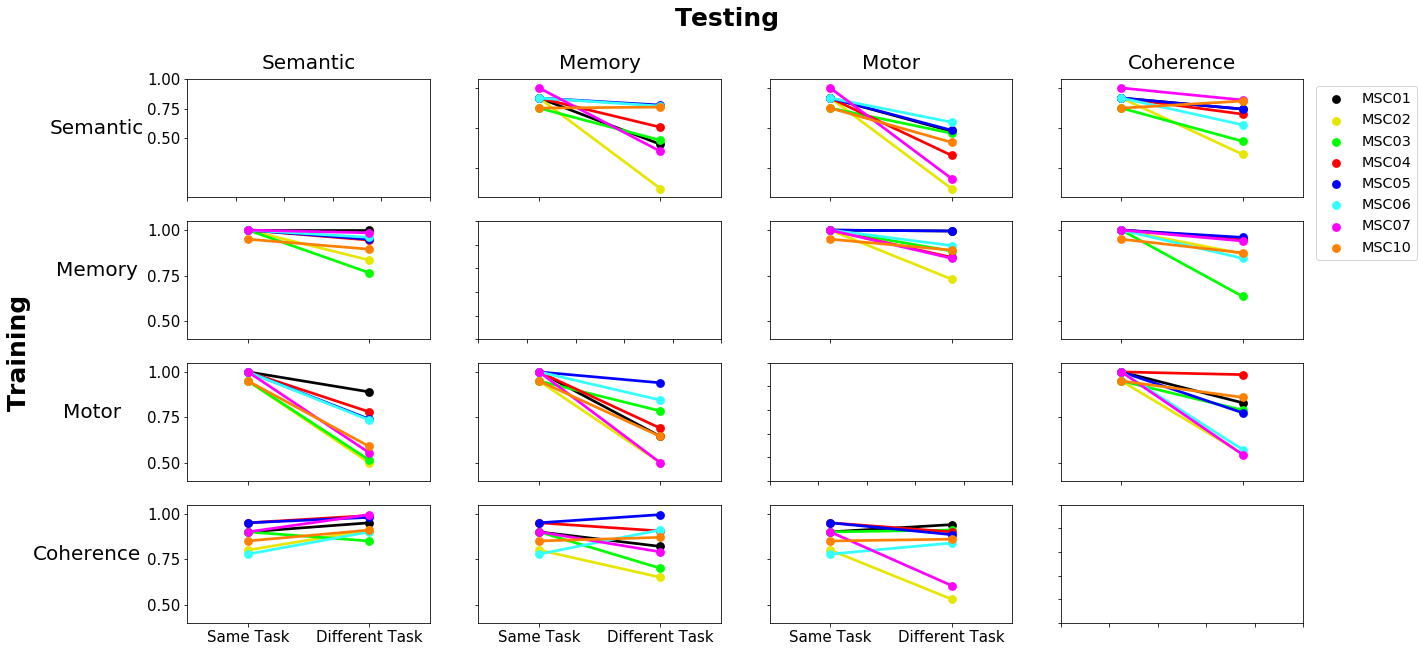

In [580]:
#CV-SS (Fig 3)
CV=pd.read_csv(outDir+'CV/acc.csv',usecols=[0,1,2])
BS=pd.read_csv(outDir+'BS/acc.csv', usecols=[0,1,2,3,4])
SS=pd.read_csv(outDir+'SS/acc.csv', usecols=[0,1,2,3])
DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
CV.rename(columns={'task':'train_task'},inplace=True)
DS.rename(columns={'task':'train_task'},inplace=True)
SS_task=SS.merge(CV, how='left', on=['train_task','sub'],suffixes=('_Diff','_Same'))
OS_task=BS.merge(DS,how='left',on=['train_task','train_sub','test_sub'],suffixes=('','_DS'))
SS_task.rename(columns={'acc_Diff':'Diff','acc_Same':'Same'},inplace=True)
OS_task.rename(columns={'acc':'Diff','acc_DS':'Same'},inplace=True)

#CV m SS
#train motor test memory 
motTmem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test semantic 
motTsem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test glass
motTglass=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test semantic 
memTsem=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test glass
memTglass=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test semantic 
glassTsem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test memory
glassTmem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test glass
semTglass=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test memory
semTmem=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.0001, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')

#Test Semantic blank
ax0=fig.add_subplot(gs[0,0])
y=[.5,.75,1.0]
plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
#ax.tick_params(labelsize=20)
#Semantic test memory
ax1=fig.add_subplot(gs[0,1],sharey=ax2)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
ax.tick_params(labelsize=15)
plt.yticks(y)
#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)

#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
plt.setp(ax8.get_xticklabels(), visible=False)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)

#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)


#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.tick_params(labelsize=15)

#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)


#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)

#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)

plt.savefig(thisDir+'output/FigsFinal/DT_CVmSS_plots.png', bbox_inches='tight')




In [65]:
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

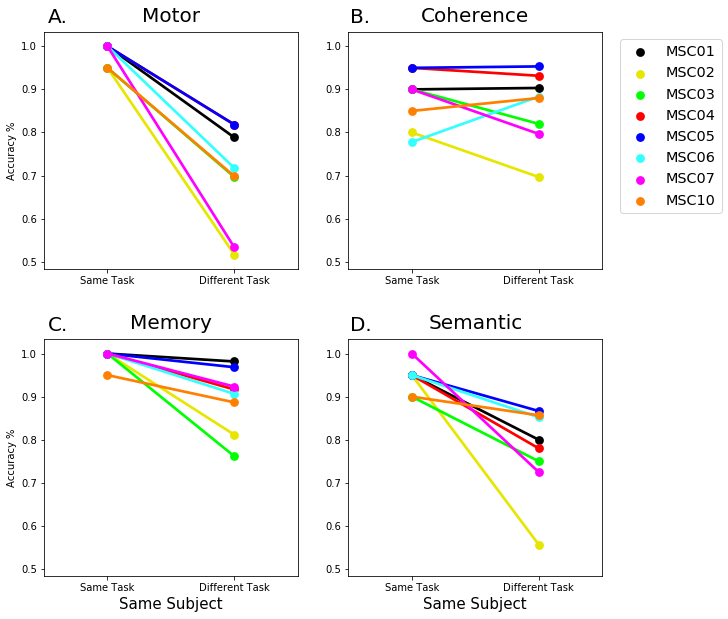

In [117]:
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax1)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='Accuracy %')
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax2)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax3)
ax.set_title('Memory',fontsize=20, pad=10)
plt.xlabel('Same Subject',fontsize=15)
ax.set(ylabel='Accuracy %')
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semanticAll,ax=ax4)
ax.set_title('Semantic',fontsize=20, pad=10)
plt.xlabel('Same Subject', fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()

#plt.savefig(thisDir+'output/FigsFinal/condensed_CVmSS_plots.png', bbox_inches='tight')

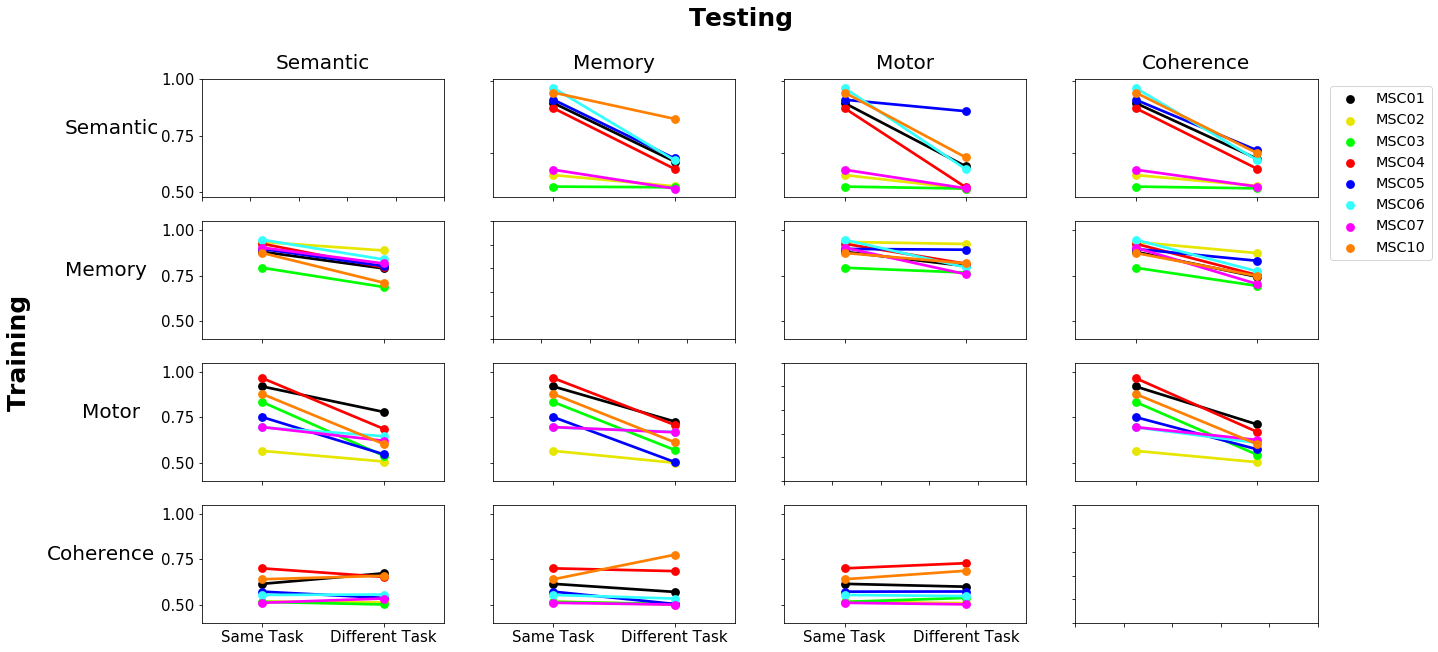

In [578]:
#DSmBS (Fig 4)
#train motor test memory 
motTmem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('train_sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train motor test semantic 
motTsem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('train_sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('train_sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('train_sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test semantic 
memTsem=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('train_sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test glass
memTglass=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('train_sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('train_sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test semantic 
glassTsem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('train_sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test memory
glassTmem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('train_sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test glass
semTglass=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('train_sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test memory
semTmem=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('train_sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.01, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')

#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)
y=[.5,.75,1.0]
plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)

#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
ax.tick_params(labelsize=15)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)

#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)

#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)


#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)

#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)

plt.savefig(thisDir+'output/FigsFinal/DT_DSmBS_plots.png', bbox_inches='tight')


In [57]:
#Broad overview of different sub but same task to different task
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

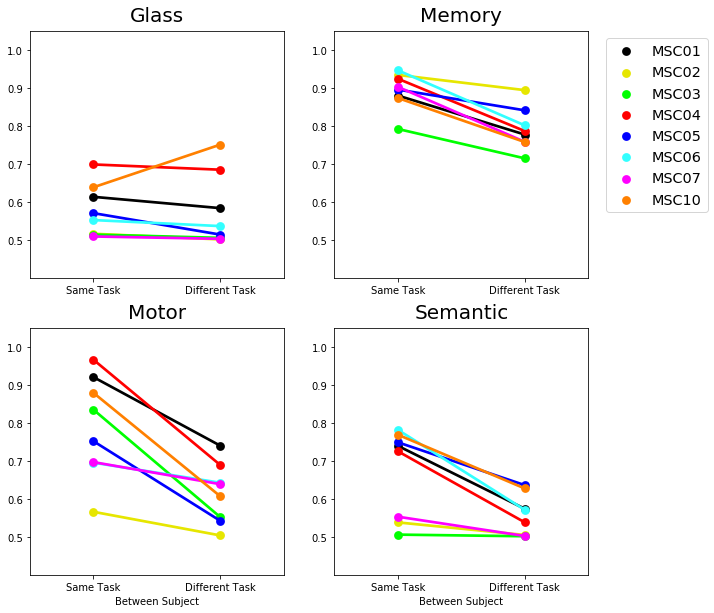

In [58]:
#Diff task 
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2)
#Broad overview of changing from same task to diff task
#All Glass
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax1)
ax.set_title('Glass',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.set(ylim=(.4, 1.05))
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax2)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax3)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='Between Subject')
ax.set(ylabel='')
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, ax=ax4, data=semanticAll)
ax.set_title('Semantic',fontsize=20, pad=10)
ax.set(xlabel='Between Subject')
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()

#plt.savefig(thisDir+'output/FigsFinal/condensed_DSmBS_plots.png', bbox_inches='tight')

In [566]:
#All tasks (Fig 5)
df=pd.read_csv(outDir+'ALL/acc.csv')
df_re=df.groupby(['train_sub']).mean()
df_re.rename(columns={'cv_acc':'Same Subject','acc':'Different Subject'},inplace=True)
df_re.reset_index(inplace=True)
res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Same Subject','Different Subject'],var_name='Analysis',value_name='acc')

sixty_days=pd.read_csv(thisDir+'output/results/permutation/manDays.csv')
sixty_days.rename(columns={'Within':'Same Subject','Between':'Different Subject'},inplace=True)
sixty_res=pd.melt(sixty_days, id_vars=['Days'], value_vars=['Same Subject', 'Different Subject'],var_name='Analysis',value_name='acc')

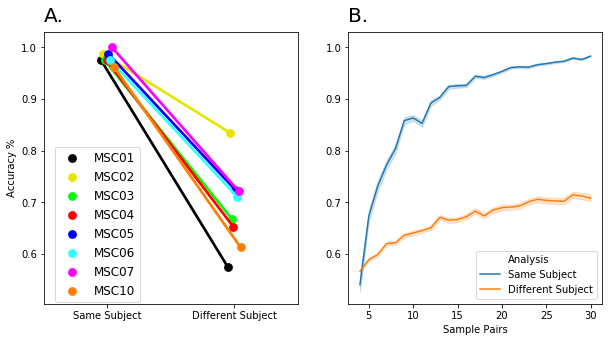

In [134]:
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2,hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=res, dodge=.1,order=['Same Subject','Different Subject'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax1.set_title('A.',fontsize=20, pad=10,loc='left')
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %")
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(.4, .6),loc='upper right',fontsize='large')

#Manipulating Days (Fig 6)
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
sns.lineplot(x='Days', y='acc', hue='Analysis', ax=ax2, data=sixty_res)
ax2.set_title('B.',fontsize=20, pad=10,loc='left')
plt.ylabel(" ")
plt.xlabel("Sample Pairs")

plt.savefig(thisDir+'output/FigsFinal/allTasks_quality.png', bbox_inches='tight')


In [613]:
#Feature selection (Fig 7 and 8)
#subnetworks overlapped with random network sampling
rand_DS=pd.read_csv(randDir+'DS/new_acc.csv')
rand_SS=pd.read_csv(randDir+'SS/new_acc.csv')
rand_BS=pd.read_csv(randDir+'BS/new_acc.csv')
rand_CV=pd.read_csv(randDir+'CV/new_acc.csv')

#zscored subnetworks
CV_z=pd.read_csv(randDir+'CV/zscore_all.csv')
SS_z=pd.read_csv(randDir+'SS/zscore_all.csv')
DS_z=pd.read_csv(randDir+'DS/zscore_all.csv')
BS_z=pd.read_csv(randDir+'BS/zscore_all.csv')

CV_z['Analysis']='Same Subject'
SS_z['Analysis']='Same Subject'
DS_z['Analysis']='Different Subject'
BS_z['Analysis']='Different Subject'

ST_z=pd.concat([CV_z, DS_z])
DT_z=pd.concat([SS_z,BS_z])



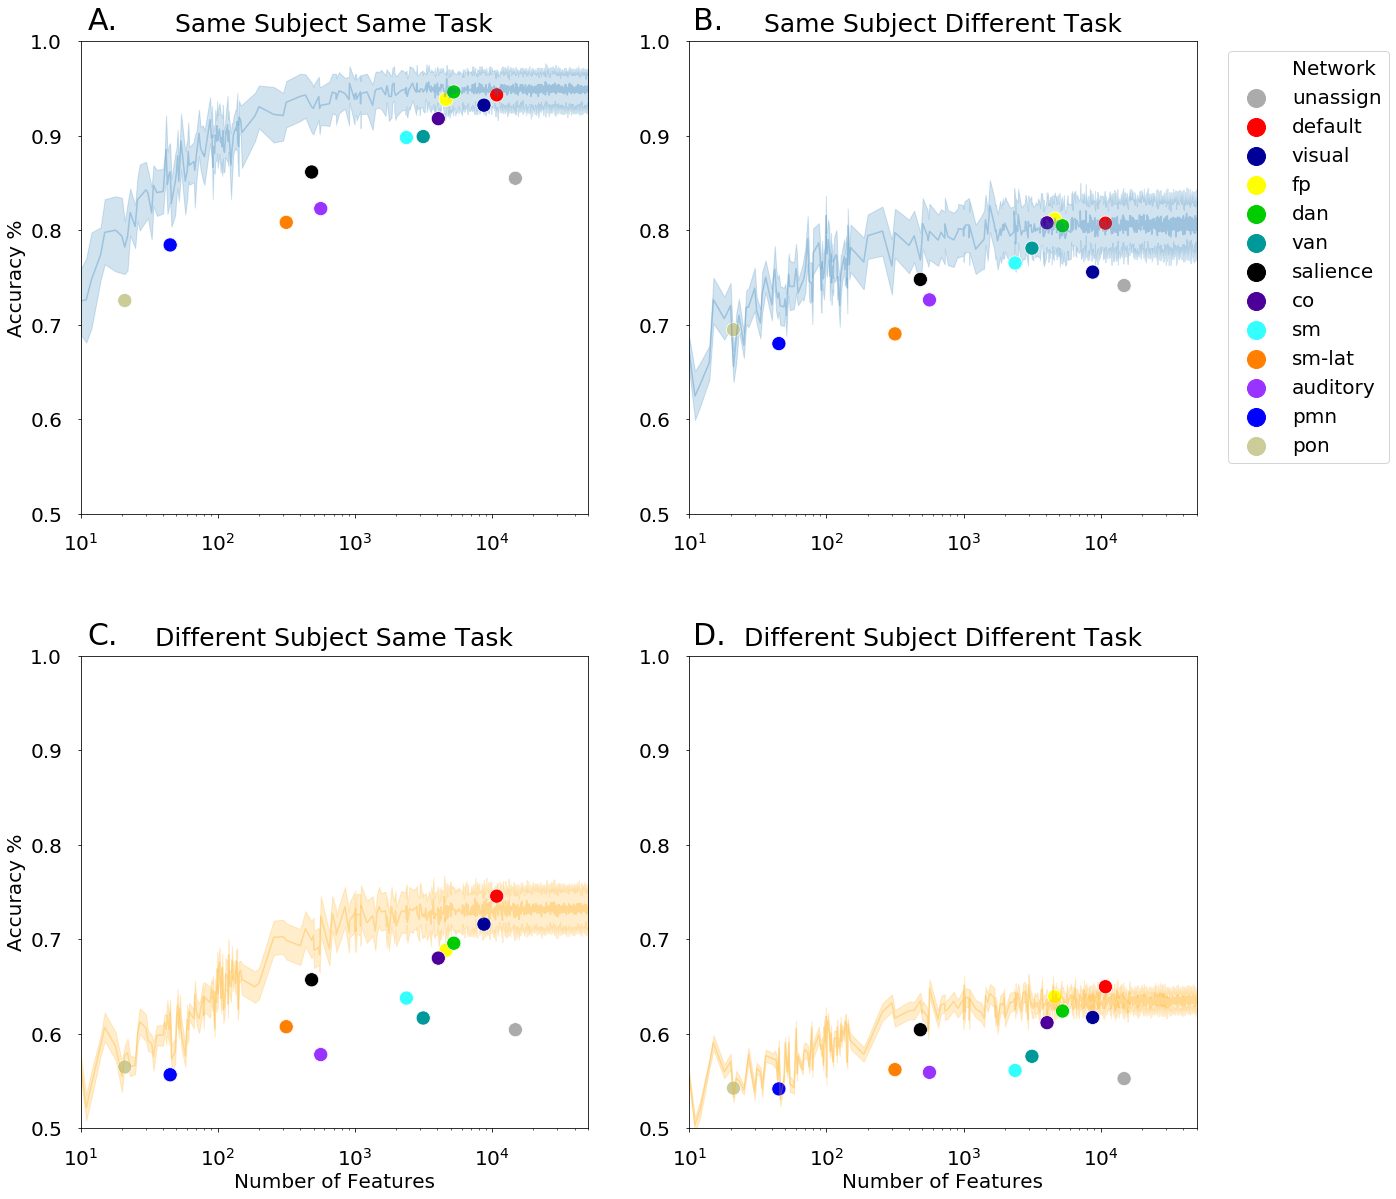

In [614]:
#Feature selection compared to null (Fig 7)
fig=plt.figure(figsize=(20,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)
fig.text(.13, .888, 'A.',fontsize=30)
fig.text(.55, .888, 'B.',fontsize=30)
fig.text(.13, .461, 'C.',fontsize=30)
fig.text(.55, .461, 'D.',fontsize=30)
#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="features", y="acc",data=rand_CV, ax=ax1,alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=CV_z, ax=ax1, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Same Task',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)

#DS
ax2=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="features", y="acc",data=rand_DS, ax=ax2, color='orange',alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=DS_z, ax=ax2, color='r',legend=False,s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Same Task',fontsize=25, pad=10)
ax.set_ylabel("Accuracy %", fontsize=20)
plt.xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)

#SS
ax3=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="features", y="acc",data=rand_SS, ax=ax3,alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=SS_z, ax=ax3, color='r',s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Different Task',fontsize=25, pad=10)
ax.set_ylabel('')
ax.set_xlabel(' ')
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)
plt.legend(markerscale=3, bbox_to_anchor=(1.4, 1),fontsize=20)
#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="features", y="acc",data=rand_BS, ax=ax4, color='orange',alpha=.3)
ax.set(xscale="log")
g=sns.scatterplot(x='features', y='Acc', hue='Network', data=BS_z, ax=ax4, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Different Task',fontsize=25, pad=10)
ax.set_ylabel('')
plt.xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=20,pad=15)





plt.savefig(thisDir+'output/FigsFinal/feature_plots.png', bbox_inches='tight')




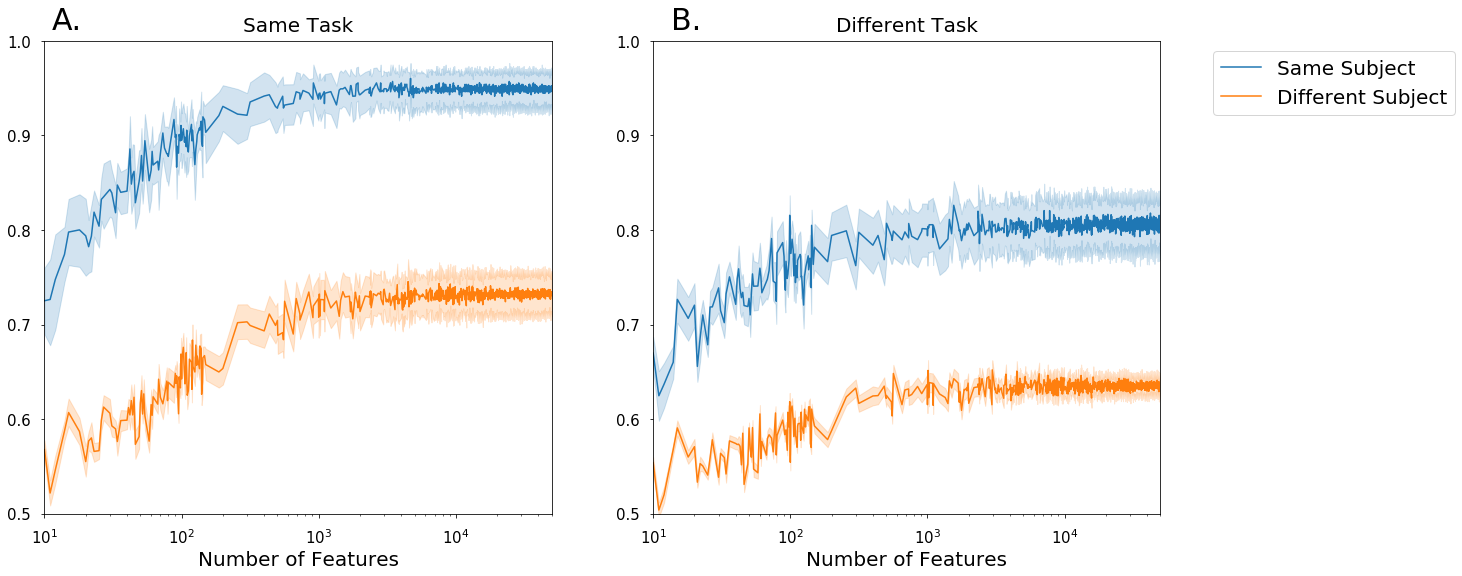

In [617]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
fig=plt.figure(figsize=(20,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)
fig.text(.13, .888, 'A.',fontsize=30)
fig.text(.56, .888, 'B.',fontsize=30)
ax7 = fig.add_subplot(gs[0, 0])
ax = sns.lineplot(x="features", y="acc",data=rand_CV, ax=ax7)
ax.set(xscale="log")
g = sns.lineplot(x="features", y="acc",data=rand_DS, ax=ax7)
ax.set_title('Same Task',fontsize=20, pad=10)
ax.set_ylabel('')
ax.set_xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)


ax8 = fig.add_subplot(gs[0, 1])
ax = sns.lineplot(x="features", y="acc",data=rand_SS, ax=ax8)
g = sns.lineplot(x="features", y="acc",data=rand_BS, ax=ax8)
ax.set(xscale="log")
ax.set_title('Different Task',fontsize=20, pad=10)
ax.set_ylabel(" ")
ax.set_xlabel('Number of Features',fontsize=20)
ax.set(ylim=(.5, 1),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)
ax.legend(('Same Subject', 'Different Subject'),loc='upper right',fontsize=20,bbox_to_anchor=(1.6, 1.0))

plt.savefig(thisDir+'output/FigsFinal/feature_overlap.png', bbox_inches='tight')



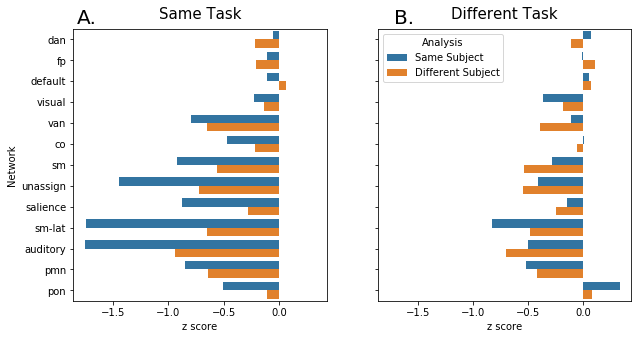

In [619]:
#Feature Z score (Fig 8)
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.57, .895, 'B.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.barplot(y='Network', x='z_score', hue='Analysis', data=ST_z,ax=ax1,order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'],orient='h')
ax.legend_.remove()
ax.set_title('Same Task',fontsize=15, pad=10)
#x.xaxis.tick_top()
plt.xlabel('z score')



ax2=fig.add_subplot(gs[0,1],sharex=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.barplot(y='Network', x='z_score', hue='Analysis', data=DT_z,ax=ax2, order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'],orient='h')
ax.set_title('Different Task',fontsize=15, pad=10)
plt.xlabel('z score')
plt.ylabel(' ')
plt.savefig(thisDir+'output/FigsFinal/zscore_feature_plots.png', bbox_inches='tight')


In [228]:
#manipulating frames
CV_permutations=pd.read_csv(thisDir+'output/results/permutation/CV/frames.csv')
BS_permutations=pd.read_csv(thisDir+'output/results/permutation/BS/frames.csv')
SS_permutations=pd.read_csv(thisDir+'output/results/permutation/SS/frames.csv')
DS_permutations=pd.read_csv(thisDir+'output/results/permutation/DS/frames.csv')

In [229]:
CV_permutations=CV_permutations[(CV_permutations['frames']<300)]
BS_permutations=BS_permutations[(BS_permutations['frames']<300)]
SS_permutations=SS_permutations[(SS_permutations['frames']<300)]
DS_permutations=DS_permutations[(DS_permutations['frames']<300)]

CV_permutations['Time']=(CV_permutations['frames']*2.2)/60
BS_permutations['Time']=(BS_permutations['frames']*2.2)/60
SS_permutations['Time']=(SS_permutations['frames']*2.2)/60
DS_permutations['Time']=(DS_permutations['frames']*2.2)/60

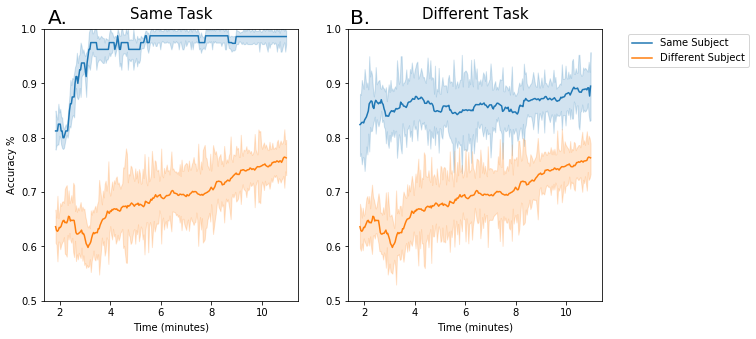

In [230]:
#Manipulating number of frames train task memory (Fig 9)
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
#CV_permutations['acc'].rolling(30).mean()
#SS_permutations['acc'].rolling(30).mean()
#BS_permutations['acc'].rolling(30).mean()
#DS_permutations['acc'].rolling(30).mean()
#CV v DS
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.55, .895, 'B.',fontsize=20)
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="Time", y='acc',data=CV_permutations,ax=ax1)#,hue='train_sub',color='r', palette=['2','5','6','7'])
ax=sns.lineplot(x="Time",y='acc',data=DS_permutations,ax=ax1)
ax.set_title('Same Task',fontsize=15, pad=10)
ax.set(ylim=(.5, 1))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel("Accuracy %")
ax.tick_params(labelsize=10)
#SS v BS
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax = sns.lineplot(x="Time", y='acc',data=SS_permutations,ax=ax2)
ax=sns.lineplot(x='Time',y='acc',data=BS_permutations,ax=ax2)
ax.set_title('Different Task',fontsize=15, pad=10)
ax.set(ylim=(.5, 1))
ax.set_ylabel('')
ax.set_xlabel('Time (minutes)')
ax.tick_params(labelsize=10)
ax.legend(('Same Subject', 'Different Subject'),loc='upper right',fontsize=10,bbox_to_anchor=(1.6, 1.0))
#plt.savefig(thisDir+'output/FigsFinal/manFramesplots.png', bbox_inches='tight')



In [370]:
ALL=pd.read_csv(outDir+'/ALL/acc.csv')
#SS
SS=pd.read_csv(outDir+'SS/acc.csv')
BS=pd.read_csv(outDir+'BS/acc.csv')
#DS
DS=pd.read_csv(outDir+'DS/acc.csv')
#CV
CV=pd.read_csv(outDir+'CV/acc.csv')

BS['Analysis']='Different Subject'
SS['Analysis']='Same Subject'
DS['Analysis']='Different Subject'
CV['Analysis']='Same Subject'

BS['clf']='Ridge'
SS['clf']='Ridge'
DS['clf']='Ridge'
CV['clf']='Ridge'

SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
CV.drop(columns=['task','sub','spec','sen'],inplace=True)

In [372]:
LR_ALL=pd.read_csv(outDir+'/ALL/acc.csv')
#SS
LR_SS=pd.read_csv(thisDir+'output/results/Log/acc/SS/acc.csv')
LR_BS=pd.read_csv(thisDir+'output/results/Log/acc/BS/acc.csv')
#DS
LR_DS=pd.read_csv(thisDir+'output/results/Log/acc/DS/acc.csv')
#CV
LR_CV=pd.read_csv(thisDir+'output/results/Log/acc/CV/acc.csv')

LR_BS['Analysis']='Different Subject'
LR_SS['Analysis']='Same Subject'
LR_DS['Analysis']='Different Subject'
LR_CV['Analysis']='Same Subject'

LR_BS['clf']='Log'
LR_SS['clf']='Log'
LR_DS['clf']='Log'
LR_CV['clf']='Log'

LR_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
LR_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
LR_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
LR_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

In [373]:
SVM_ALL=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/ALL/precision_acc.csv')
#SS
SVM_SS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/SS/acc.csv')
SVM_BS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/BS/acc.csv')
#DS
SVM_DS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/DS/acc.csv')
#CV
SVM_CV=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/CV/acc.csv')

SVM_BS['Analysis']='Different Subject'
SVM_SS['Analysis']='Same Subject'
SVM_DS['Analysis']='Different Subject'
SVM_CV['Analysis']='Same Subject'

SVM_BS['clf']='SVM'
SVM_SS['clf']='SVM'
SVM_DS['clf']='SVM'
SVM_CV['clf']='SVM'

SVM_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
SVM_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
SVM_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
SVM_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

In [374]:
diffTask=pd.concat([SS,BS, LR_SS, LR_BS,SVM_SS,SVM_BS])
sameTask=pd.concat([CV,DS, LR_CV, LR_DS,SVM_CV,SVM_DS])

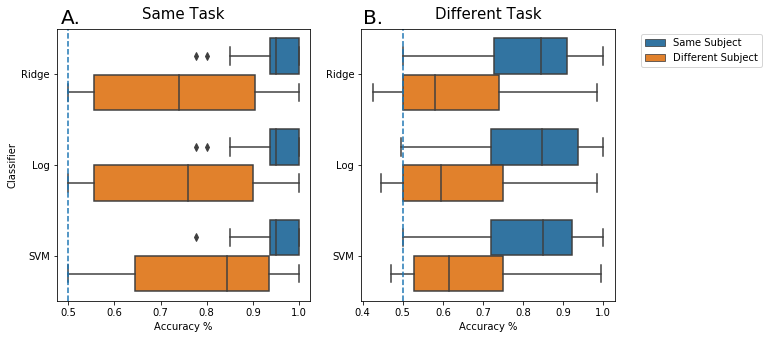

In [376]:
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.55, .895, 'B.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
ax1=fig.add_subplot(gs[0,0])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=sameTask,orient='h',ax=ax1)
ax1.set_title('Same Task',fontsize=15, pad=10)
plt.xlabel('Accuracy %')
plt.ylabel('Classifier')
ax1.legend_.remove()
ax1.axvline(.5, ls='--')
ax2=fig.add_subplot(gs[0,1])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=diffTask,orient='h',ax=ax2)
ax2.set_title('Different Task',fontsize=15, pad=10)
plt.xlabel('Accuracy %')
plt.ylabel(' ')
ax2.axvline(.5, ls='--')
ax2.legend(loc='upper right',fontsize=10,bbox_to_anchor=(1.6, 1.0))
plt.savefig(thisDir+'output/FigsFinal/clf_comp_plots.png', bbox_inches='tight')


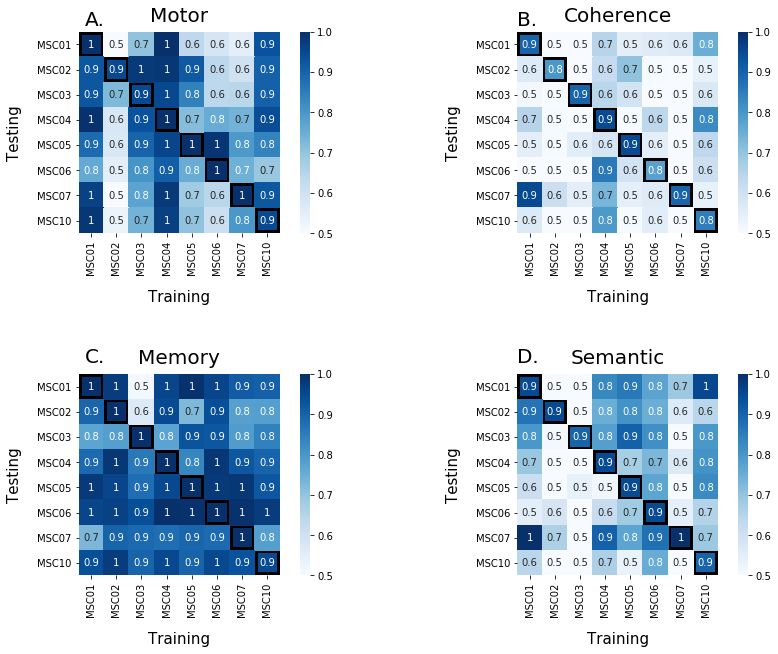

In [553]:
fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.24, .888, 'A.',fontsize=20)
fig.text(.64, .888, 'B.',fontsize=20)
fig.text(.24, .42, 'C.',fontsize=20)
fig.text(.64, .42, 'D.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.1, hspace=.7)
#Comparison to the same sub same task performance
CV=pd.read_csv(outDir+'CV/acc.csv')
grouped_CV=CV.groupby('task')
#diff sub same task 
df=pd.read_csv(outDir+'DS/acc.csv')
grouped_df=df.groupby('task')
for task in taskList:
    #Same sub same task
    task_CV=grouped_CV.get_group(task)
    task_CV.drop(columns=['task'], inplace=True)
    task_CV['test_sub']=task_CV['sub']
    task_CV=task_CV.pivot(index='sub', columns='test_sub', values='acc')
    #Diff sub same task
    task_df=grouped_df.get_group(task)
    task_df.drop(columns=['task'], inplace=True)
    task_df=task_df.pivot(index='test_sub', columns='train_sub', values='acc')
    
    if task=='glass':
        ax1=fig.add_subplot(gs[0,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax1,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax1,fmt=".1g",square=True)
        ax.set_title('Coherence',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    elif task=='motor':
        ax2=fig.add_subplot(gs[0,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True)
        ax.set_title('Motor',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    elif task=='semantic':
        ax3=fig.add_subplot(gs[1,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True)
        ax.set_title('Semantic',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    else:
        ax4=fig.add_subplot(gs[1,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True)
        ax.set_title('Memory',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)

        
plt.savefig(thisDir+'output/FigsFinal/sub_comp_heatplots.png', bbox_inches='tight')

In [492]:
pair_motor.set_index('sub',inplace=True)
pair_motor.drop(['MSC05','MSC06','MSC07','MSC10'],inplace=True)
pair_motor.reset_index(inplace=True)

pair_glass.set_index('sub',inplace=True)
pair_glass.drop(['MSC05','MSC06','MSC07','MSC10'],inplace=True)
pair_glass.reset_index(inplace=True)

pair_mem.set_index('sub',inplace=True)
pair_mem.drop(['MSC05','MSC06','MSC07','MSC10'],inplace=True)
pair_mem.reset_index(inplace=True)

pair_sem.set_index('sub',inplace=True)
pair_sem.drop(['MSC05','MSC06','MSC07','MSC10'],inplace=True)
pair_sem.reset_index(inplace=True)

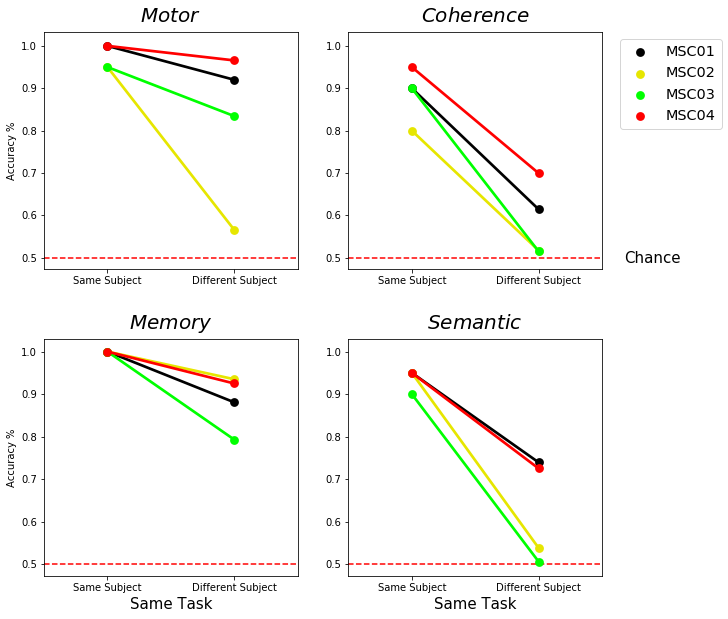

In [506]:
#Smaller fig for overview 

#Same Task (Fig 1)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.axhline(.5, ls='--',color='r')
plt.xlabel('')
plt.ylabel('Accuracy %')
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=20, pad=10)
ax.axhline(.5, ls='--',color='r')
plt.ylabel('')
plt.xlabel('')
fig.text(.93, .56, 'Chance',fontsize=15)
#memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
ax.axhline(.5, ls='--',color='r')
plt.ylabel('Accuracy %')
plt.xlabel('Same Task',fontsize=15)

ax4=fig.add_subplot(gs[1,1],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4'])
plt.legend(bbox_to_anchor=(1.5, 2.3),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=20, pad=10)
ax.axhline(.5, ls='--',color='r')
plt.ylabel('')
plt.xlabel('Same Task',fontsize=15)
plt.savefig(thisDir+'output/FigsFinal/CVDS_DIAGRAM_point_plots.png', bbox_inches='tight')



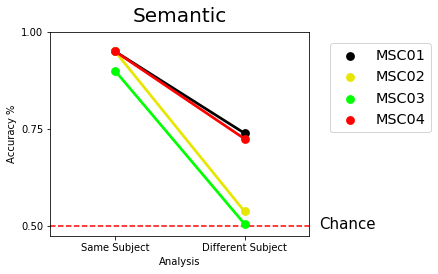

In [542]:
#Just semantic
fig = plt.figure()
ax = fig.add_subplot(111, aspect='3')
sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax, order=['Same Subject','Different Subject'], color='r', palette=['1','2','3','4'])
plt.legend(bbox_to_anchor=(1.5, .98),loc='upper right',fontsize='x-large')
ax.set_title('Semantic', fontsize=20, pad=10)
ax.axhline(.5, ls='--',color='r')
plt.ylabel('Accuracy %')
fig.text(.73, .17, 'Chance',fontsize=15)
y=[.5,.75,1.0]
plt.yticks(y)
plt.savefig(thisDir+'output/FigsFinal/CVDS_SEM_DIAGRAM_point_plots.png', bbox_inches='tight')


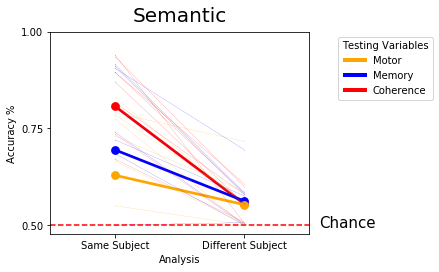

In [550]:
#Different Task (fig 2)
#need to add lines for individual subjects
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
               Line2D([0], [0], color='red', lw=4)]

#Semantic
fig = plt.figure()
ax4 = fig.add_subplot(111, aspect='3')
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['red','blue','orange'], data=diff_sem, ax=ax4)
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_sem_glass, palette=['red'],ax=ax4)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_sem_mem, palette=['blue'],ax=ax4)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Subject','Different Subject'], ci=None,scale=.05, data=DT_sem_mot, palette=['orange'],ax=ax4)
g3.legend_.remove()
ax.set_title('Semantic', fontsize=20, pad=10)
ax.set(ylabel='Accuracy %')
ax.legend(custom_lines, ['Motor', 'Memory','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Variables')
fig.text(.73, .17, 'Chance',fontsize=15)
y=[.5,.75,1.0]
plt.yticks(y)
ax.axhline(.5, ls='--',color='r')
plt.savefig(thisDir+'output/FigsFinal/SSBS_SEM_DIAGRAM_point_plots.png', bbox_inches='tight')
